We first import all the necessary libraries that will be required for this data analysis.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]
sns.set()

In [2]:
df = pd.read_csv(r'C:\Users\riddh\Downloads/data.csv')
print(df)

       RestaurantName_Type      Restaurant_Type Restaurant_Menu Dish_Price  \
0               Dakota Bar                  Pub        Radiance      $9.95   
1           Hudson Station                  Pub        Radiance      $7.95   
2               Muk Eun Ji  Barbecue restaurant        Radiance      $8.95   
3                 Cafe Jax                CafÃ©        Radiance      $8.95   
4       Pennsylvania 6 NYC                  Pub        Radiance      $9.95   
...                    ...                  ...             ...        ...   
148057                 NaN                  NaN             NaN        NaN   
148058                 NaN                  NaN             NaN        NaN   
148059                 NaN                  NaN             NaN        NaN   
148060                 NaN                  NaN             NaN        NaN   
148061                 NaN                  NaN             NaN        NaN   

       Dish_Price_NoDollar          Dish_Type  Cuisine Dish_Cou

C:\Users\riddh\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Next, we want to see what all columns are there in the file presented. 

In [3]:
#reading column names
for col in df.columns:
    print(col)

RestaurantName_Type
Restaurant_Type
Restaurant_Menu
Dish_Price
Dish_Price_NoDollar
Dish_Type
Cuisine
Dish_Course
Advertised_ingredients
Adv_Dishes


# Understanding the famous restaurant types in New York.

We wish to see which kind of restaurant is most there in the city. The reason for this is simple - more a particular type of restaurant that exists within a city, it indicates how much popular that type of restaurant is. We find here that 'PUBS' are the most popular with a count of 61.

In [4]:
#most common restaurant type
df.Restaurant_Type.mode()

0    Pub
dtype: object

In [5]:
#finding how many restaurant types are there
df['Restaurant_Type'].value_counts()


Pub                       61
Pizzeria                  36
CafÃ©                     27
Barbecue restaurant        4
Brasserie and bistro       4
Steakhouse Restaurants     1
Name: Restaurant_Type, dtype: int64

Printing Pub Names

In [6]:
for col in range(0,132):
    pubs_names = df.loc[df['Restaurant_Type'] == 'Pub']
    print(pubs_names)

       RestaurantName_Type Restaurant_Type          Restaurant_Menu  \
0               Dakota Bar             Pub                 Radiance   
1           Hudson Station             Pub                 Radiance   
4       Pennsylvania 6 NYC             Pub                 Radiance   
5    Chelton's Bar & Grill             Pub     Pinocchio Restaurant   
6     Adrienne's Pizza Bar             Pub        New Sunny East 88   
..                     ...             ...                      ...   
124            Dorian Gray             Pub               Luna Pizza   
125              Twins Pub             Pub       Hop Lee Restaurant   
126                SakaMai             Pub  Bawarchi Indian Cuisine   
127   Pierre Loti Wine Bar             Pub  Bawarchi Indian Cuisine   
132      Down The Road Pub             Pub               New Dragon   

    Dish_Price Dish_Price_NoDollar             Dish_Type    Cuisine  \
0        $9.95                9.95              Dumpling    Sichuan   
1    

In [7]:
df.head()

,RestaurantName_Type,Restaurant_Type,Restaurant_Menu,Dish_Price,Dish_Price_NoDollar,Dish_Type,Cuisine,Dish_Course,Advertised_ingredients,Adv_Dishes
0,Dakota Bar,Pub,Radiance,$9.95,9.95,Dumpling,Sichuan,Starters,potato salad,Katz's Classic Luncheon Cold Cut Platter
1,Hudson Station,Pub,Radiance,$7.95,7.95,Dumpling,Chinese,Starters,corned beef,Katz's Classic Luncheon Cold Sandwiches
2,Muk Eun Ji,Barbecue restaurant,Radiance,$8.95,8.95,Milk Based Drinks,Sichuan,Drinks,water,Bottled Water
3,Cafe Jax,CafÃ©,Radiance,$8.95,8.95,Milk Based Drinks,Chinese,Drinks,sour pickles,Full Sour Pickles - 1 Qt
4,Pennsylvania 6 NYC,Pub,Radiance,$9.95,9.95,Dumpling,Chinese,Starters,potato salad,Small Potato Salad


Now that we have seen and understood, which type of restaurant is most famous, we can now drop the columns that are no longer of use to us. This is - Restaurant_Type, RestaurantName_Type and Restaurant_Menu(specifying the particular rest from menu sheet).

This allows us to have a more smaller dataframe to work with, giving us a more concise area to work upon, and narrowing down what we must analyse next.

In [8]:
df.drop(["Restaurant_Type"], axis =1, inplace =True)

In [9]:
df.drop(["RestaurantName_Type"], axis =1, inplace =True)

In [10]:
df.drop(["Restaurant_Menu"], axis =1, inplace =True)

The columns "Dish Price" had the value of $(some value) in the excel sheet presented. Before the analysis was started, a seperate column was created that eliminated all the dollar signs so that the value can be read as a number.

In [11]:
df.drop(["Dish_Price"], axis =1, inplace =True)

In [12]:
df.head()

,Dish_Price_NoDollar,Dish_Type,Cuisine,Dish_Course,Advertised_ingredients,Adv_Dishes
0,9.95,Dumpling,Sichuan,Starters,potato salad,Katz's Classic Luncheon Cold Cut Platter
1,7.95,Dumpling,Chinese,Starters,corned beef,Katz's Classic Luncheon Cold Sandwiches
2,8.95,Milk Based Drinks,Sichuan,Drinks,water,Bottled Water
3,8.95,Milk Based Drinks,Chinese,Drinks,sour pickles,Full Sour Pickles - 1 Qt
4,9.95,Dumpling,Chinese,Starters,potato salad,Small Potato Salad


# Tells us the rows and columns presented in the data frame.

14860 = rows
6 = columns

In [13]:
print(df.shape[0])
print(df.shape[1])

148062
6


Due to the removal of dollar sign, certain values have errors in excel sheet. We must remove these errors before proceeding forward.

In [14]:
df["Dish_Price_NoDollar"].replace({"#NAME?": "0"}, inplace=True)
print(df)

       Dish_Price_NoDollar          Dish_Type  Cuisine Dish_Course  \
0                     9.95           Dumpling  Sichuan    Starters   
1                     7.95           Dumpling  Chinese    Starters   
2                     8.95  Milk Based Drinks  Sichuan      Drinks   
3                     8.95  Milk Based Drinks  Chinese      Drinks   
4                     9.95           Dumpling  Chinese    Starters   
...                    ...                ...      ...         ...   
148057             #VALUE!                NaN      NaN         NaN   
148058             #VALUE!                NaN      NaN         NaN   
148059             #VALUE!                NaN      NaN         NaN   
148060             #VALUE!                NaN      NaN         NaN   
148061             #VALUE!                NaN      NaN         NaN   

       Advertised_ingredients                                   Adv_Dishes  
0                potato salad     Katz's Classic Luncheon Cold Cut Platter  
1    

In [15]:
df["Dish_Price_NoDollar"].replace({"#VALUE!": "0"}, inplace=True)
print(df)

       Dish_Price_NoDollar          Dish_Type  Cuisine Dish_Course  \
0                     9.95           Dumpling  Sichuan    Starters   
1                     7.95           Dumpling  Chinese    Starters   
2                     8.95  Milk Based Drinks  Sichuan      Drinks   
3                     8.95  Milk Based Drinks  Chinese      Drinks   
4                     9.95           Dumpling  Chinese    Starters   
...                    ...                ...      ...         ...   
148057                   0                NaN      NaN         NaN   
148058                   0                NaN      NaN         NaN   
148059                   0                NaN      NaN         NaN   
148060                   0                NaN      NaN         NaN   
148061                   0                NaN      NaN         NaN   

       Advertised_ingredients                                   Adv_Dishes  
0                potato salad     Katz's Classic Luncheon Cold Cut Platter  
1    

In [16]:
df.head()

,Dish_Price_NoDollar,Dish_Type,Cuisine,Dish_Course,Advertised_ingredients,Adv_Dishes
0,9.95,Dumpling,Sichuan,Starters,potato salad,Katz's Classic Luncheon Cold Cut Platter
1,7.95,Dumpling,Chinese,Starters,corned beef,Katz's Classic Luncheon Cold Sandwiches
2,8.95,Milk Based Drinks,Sichuan,Drinks,water,Bottled Water
3,8.95,Milk Based Drinks,Chinese,Drinks,sour pickles,Full Sour Pickles - 1 Qt
4,9.95,Dumpling,Chinese,Starters,potato salad,Small Potato Salad


Counting the values from the cuisine column.

We wish to see how many types of cuisines are there, in the dishes specified to understand which cuisines are served more and which are served in a relatively less quantity. We can visualise it by drawing a pie chart.

In [17]:
cuisine_cnt = df['Cuisine'].value_counts()
cuisine_cnt

American          8729
French            4355
Chinese           3632
Swiss             2837
Japanese          2735
                  ... 
Georgian             8
South American       7
Brazilian            6
Portuguese           6
Uruguayan            5
Name: Cuisine, Length: 73, dtype: int64

Displaying first 20 cuisines.

In [18]:
cuisine_cnt_20 = cuisine_cnt.head(20)
cuisine_cnt_20

American         8729
French           4355
Chinese          3632
Swiss            2837
Japanese         2735
Thai             2635
Italian          2602
New England      2481
Sichuan          1592
Greek            1224
Mexican          1027
Hunan             935
Indian            760
Spanish           566
Cantonese         547
Mediterranean     544
Chilean           513
Korean            500
Singaporean       449
Irish             410
Name: Cuisine, dtype: int64

Plotting the piechart for cuisine.

<AxesSubplot:ylabel='Cuisine'>

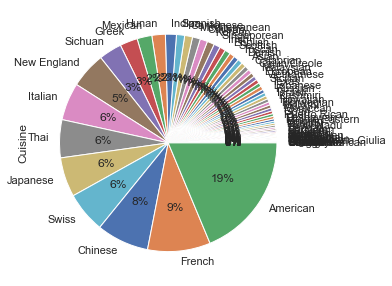

In [19]:
df.Cuisine.value_counts().sort_values().plot(kind = 'pie', autopct = '%1.0f%%')


Seeing the dish type available.

In [20]:
dishtype_cnt = df['Dish_Type'].value_counts()
dishtype_cnt 

Burgers and Sandwiches            9930
Sushi                             4337
Confectionery and Healthy Bars    3946
Cold Cuts                         3278
Breads                            2540
                                  ... 
Doughnut                             7
Gin                                  6
Mocktails                            6
Waffle                               6
Vodka                                1
Name: Dish_Type, Length: 99, dtype: int64

In [21]:
dishtype_cnt_50 = dishtype_cnt.head(50)
dishtype_cnt_50

Burgers and Sandwiches            9930
Sushi                             4337
Confectionery and Healthy Bars    3946
Cold Cuts                         3278
Breads                            2540
Pasta                             2140
Coffee                            2105
Poultry Based                     1998
Rice and Grains                   1967
Seafood Based                     1813
Salad                             1693
Soup                              1684
Pizza                             1598
Rolls / Wraps                     1563
Noodles                           1490
Processed Meat Based              1401
Beer                              1400
Tea                               1116
Snack                             1061
Dessert                            959
Juices                             948
Beef Based                         786
Chips                              701
Flat Breads                        669
Bowl                               576
Egg Based                

<AxesSubplot:ylabel='Dish_Type'>

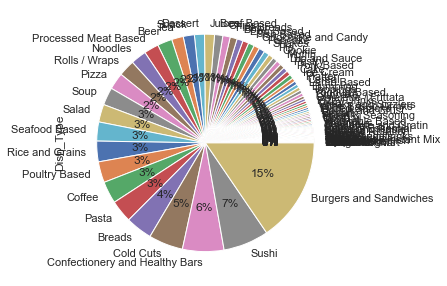

In [22]:

df.Dish_Type.value_counts().sort_values().plot(kind = 'pie', autopct = '%1.0f%%')

Plotting the most available dish courses available to understand which all are available across NY.

In [23]:
df['Dish_Price_NoDollar']= df['Dish_Price_NoDollar'].astype(float)


In [24]:
df['Dish_Course'].mode()

0    Mains
dtype: object

<AxesSubplot:>

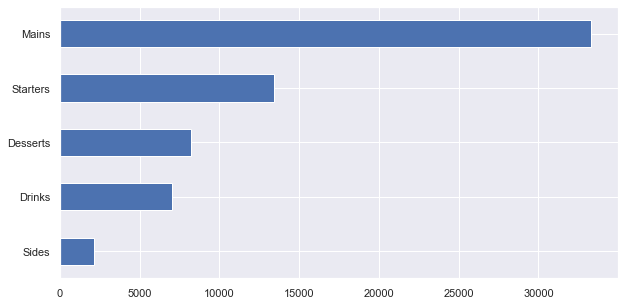

In [25]:

df.Dish_Course.value_counts().sort_values().plot(kind = 'barh')

Which dish type is famous under dish course?

In [26]:
a=df.loc[df['Dish_Course'] == 'Mains', 'Dish_Type']
a

6                                  Meal
7                                  Meal
8                         Yoghurt Based
14                               Skewer
18                                 Meal
                      ...              
63822    Confectionery and Healthy Bars
63825    Confectionery and Healthy Bars
63994    Confectionery and Healthy Bars
64031    Confectionery and Healthy Bars
64135    Confectionery and Healthy Bars
Name: Dish_Type, Length: 33324, dtype: object

In [45]:
count_of_dish_Course = pd.DataFrame(a)
count_of_dish_Course

,Dish_Type
6,Meal
7,Meal
8,Yoghurt Based
14,Skewer
18,Meal
...,...
63822,Confectionery and Healthy Bars
63825,Confectionery and Healthy Bars
63994,Confectionery and Healthy Bars
64031,Confectionery and Healthy Bars


In [46]:
count_dish = count_of_dish_Course['Dish_Type'].value_counts()
count_dish

Burgers and Sandwiches            9389
Pasta                             2095
Cold Cuts                         2077
Poultry Based                     1901
Rice and Grains                   1789
Seafood Based                     1692
Rolls / Wraps                     1554
Noodles                           1316
Processed Meat Based              1313
Pizza                             1238
Sushi                             1238
Beef Based                         786
Flat Breads                        640
Fish Based                         571
Egg Based                          571
Bowl                               500
Pork Based                         428
Pancake                            358
Breads                             348
Lamb Based                         312
Salad                              292
Cereal                             272
Pie                                205
Curry                              199
Omelette / Frittata                198
Steaks and Sizzlers      

Identifying what all drinks are available.

In [27]:
drinks_count=df.loc[df['Dish_Course'] == 'Drinks', 'Dish_Type']
drinks_count

2                     Milk Based Drinks
3                     Milk Based Drinks
9                          Fizzy Drinks
10                         Fizzy Drinks
12                         Fizzy Drinks
                      ...              
64110    Confectionery and Healthy Bars
64111    Confectionery and Healthy Bars
64126    Confectionery and Healthy Bars
64127    Confectionery and Healthy Bars
64133    Confectionery and Healthy Bars
Name: Dish_Type, Length: 7012, dtype: object

In [28]:
count_of_drinks_df = pd.DataFrame(drinks_count)
count_of_drinks_df

,Dish_Type
2,Milk Based Drinks
3,Milk Based Drinks
9,Fizzy Drinks
10,Fizzy Drinks
12,Fizzy Drinks
...,...
64110,Confectionery and Healthy Bars
64111,Confectionery and Healthy Bars
64126,Confectionery and Healthy Bars
64127,Confectionery and Healthy Bars


Counting the number of each kind of drink available.

In [29]:
count_drinks = count_of_drinks_df['Dish_Type'].value_counts()
count_drinks

Coffee                            1624
Beer                              1400
Tea                               1051
Juices                             854
Confectionery and Healthy Bars     571
Shakes                             499
Fizzy Drinks                       211
Wine Based Drinks                  188
Yoghurt Based                      174
Cocktail                           106
Smoothie                            79
Pizza                               34
Milk Based Drinks                   32
Salad                               28
Ice Cream                           27
Spice & Seasoning                   26
Cereal                              20
Plain Drinks                        20
Whisky                              20
Chocolate and Candy                 16
Parfait                              9
Gin                                  6
Mocktails                            6
Burgers and Sandwiches               6
Frozen Yoghurt                       4
Vodka                    

Plotting the graph

<AxesSubplot:>

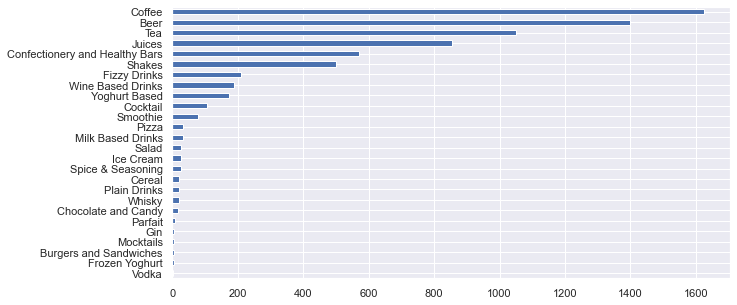

In [30]:
count_of_drinks_df.Dish_Type.value_counts().sort_values().plot(kind = 'barh')

Understanding the most advertised ingredients and seeing the most advertised product that can help in the public promotion of the restaurant.

In [31]:
adv_ing = df['Advertised_ingredients'].value_counts()
adv_ing

cheese                   5265
chicken                  4729
tomato                   3434
rice                     3344
lettuce                  2222
                         ... 
bengal gram                 1
cape gooseberries           1
white chocolate chips       1
vegetable potstickers       1
craw fish                   1
Name: Advertised_ingredients, Length: 3583, dtype: int64

In [32]:
adver_ingre = pd.DataFrame(adv_ing)
adver_ingre

,Advertised_ingredients
cheese,5265
chicken,4729
tomato,3434
rice,3344
lettuce,2222
...,...
bengal gram,1
cape gooseberries,1
white chocolate chips,1
vegetable potstickers,1


Top 50 advertised ingredients.

In [33]:
adver_ingre=adver_ingre.head(50)
adver_ingre

,Advertised_ingredients
cheese,5265
chicken,4729
tomato,3434
rice,3344
lettuce,2222
onions,2189
beef,2062
shrimp,1925
tomatoes,1883
onion,1666


Most advertised item is Cheese, closely followed by Chicken. The rest include, tomato, rice and lettuce.

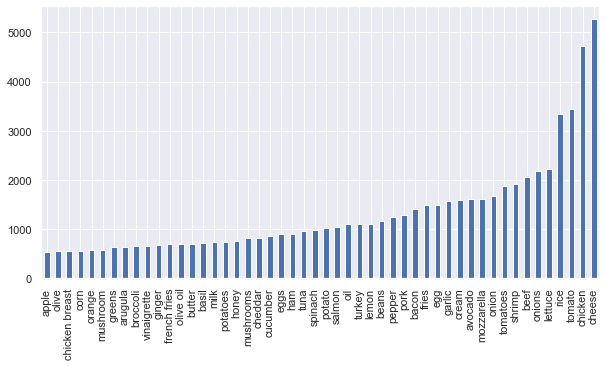

In [34]:

adver_ingre.Advertised_ingredients.sort_values().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = [2,8]

Comparing the dish price of each cuisine and finding the average price that each person is willing to pay at a restaurant.

In [35]:
comp_dish_price_type = df.groupby('Cuisine', as_index=False)['Dish_Price_NoDollar'].mean()
comp_dish_price_type

,Cuisine,Dish_Price_NoDollar
0,Afghan,8.557143
1,African,13.600000
2,American,7.978458
3,Andhra,3.556061
4,Asian,12.733025
...,...,...
68,Thai,13.628786
69,Turkish,11.066667
70,Tuscan,21.290346
71,Uruguayan,13.800000


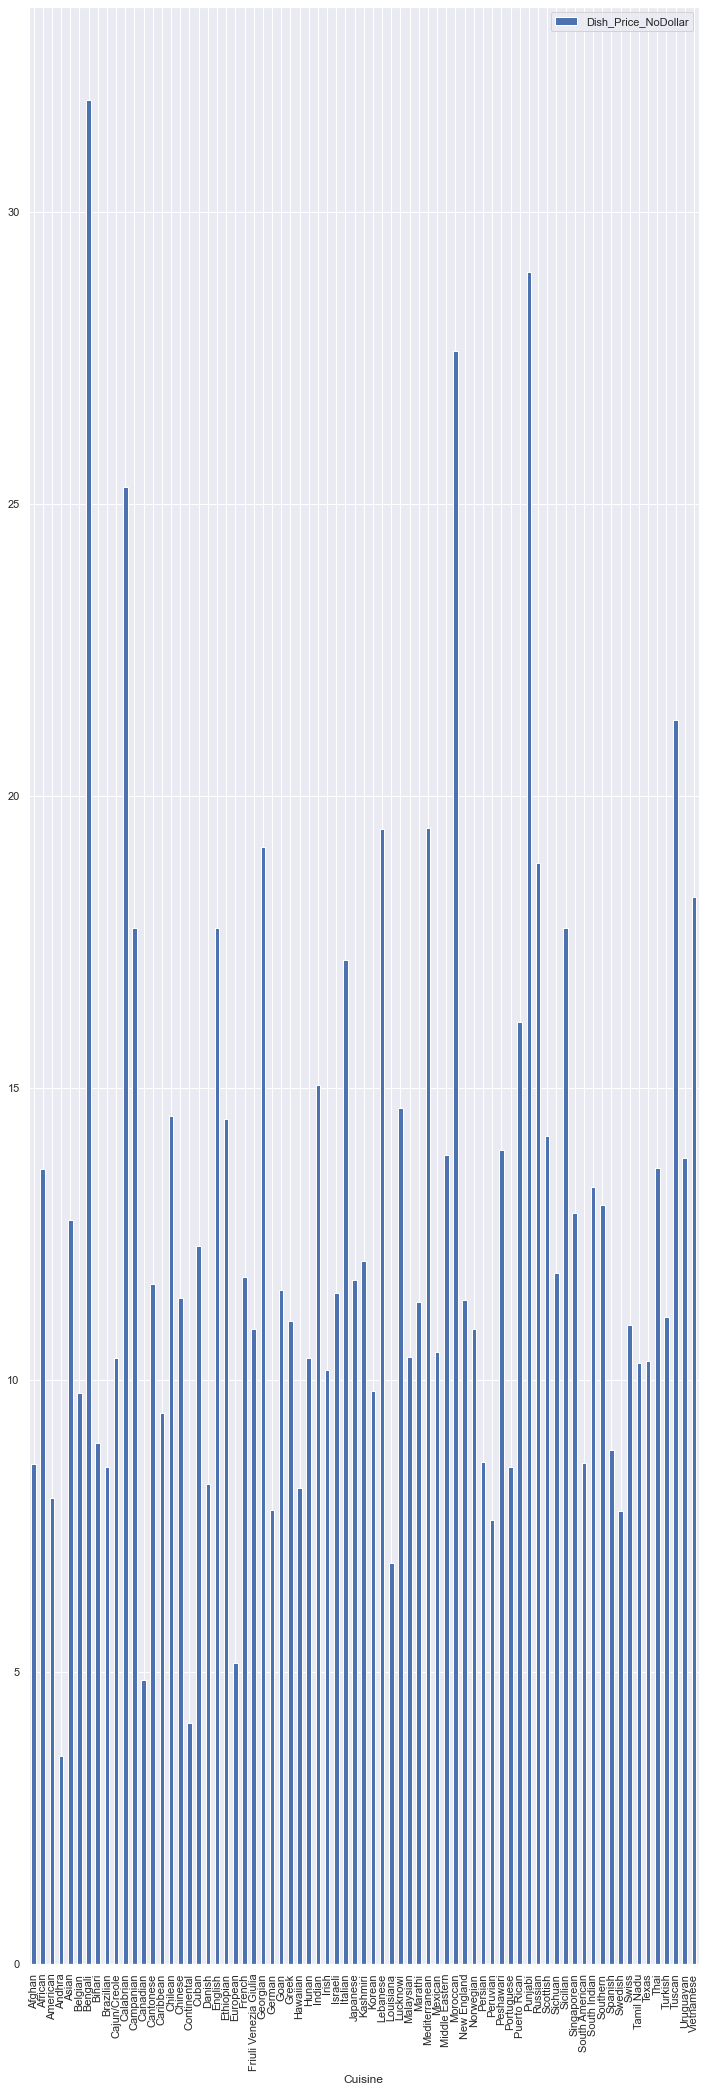

In [43]:
comp_dish_price_type.plot('Cuisine', 'Dish_Price_NoDollar', kind='bar')  
plt.rcParams["figure.figsize"] = (12,42)

Highest payable amount for Bengali Cusine is 31 Dollars

In [37]:
comp_dish_price_type.loc[comp_dish_price_type['Dish_Price_NoDollar'].idxmax()]

Cuisine                  Bengali
Dish_Price_NoDollar    31.916216
Name: 6, dtype: object

Finding the average price a person will pay for food.

In [38]:
comp_dish_price_type.mean(axis=0)

C:\Users\riddh\AppData\Local\Temp/ipykernel_16256/3436801352.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  comp_dish_price_type.mean(axis=0)


Dish_Price_NoDollar    12.701099
dtype: float64